# import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import zscore as zs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\KSK\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Users\KSK\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Users\KSK\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


# load the dataset

In [23]:
df_loan=pd.read_csv('C:/Users/KSK/Downloads/unsupervised learning day1,day2 inclass,take home/loan.csv')

In [3]:
df_loan.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# label encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [24]:
df_loan['Gender']=le.fit_transform(df_loan['Gender'])

In [7]:
df_loan['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

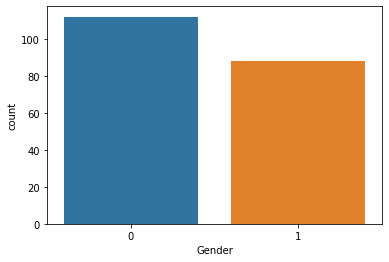

In [8]:
sns.countplot(df_loan['Gender'])
plt.show()

# summary

In [9]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null int32
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int32(1), int64(4)
memory usage: 7.1 KB


# drop unncecessary columns

In [25]:
df_loan.drop('CustomerID',axis=1,inplace=True)

In [11]:
df_loan.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# EDA

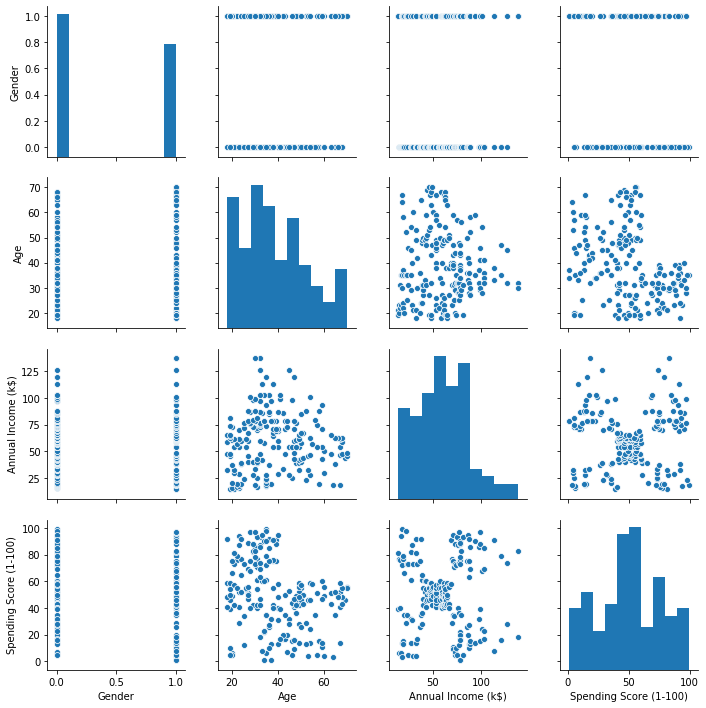

In [14]:
sns.pairplot(df_loan,palette='Set2')
plt.show()

In [48]:
x=df_loan[['Annual Income (k$)','Spending Score (1-100)']]

# randomly initializing the centroids 

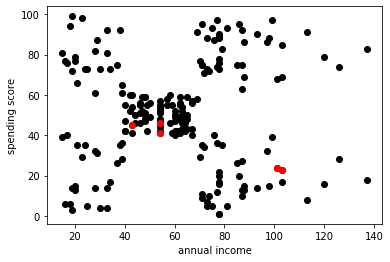

In [50]:
k=5
centroids=x.sample(n=k)
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c='black')
plt.scatter(centroids['Annual Income (k$)'],centroids['Spending Score (1-100)'],c='red')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

In [53]:
df_loan.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

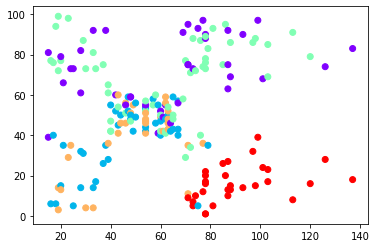

In [61]:
plt.scatter(df_loan.iloc[:,2],df_loan.iloc[:,3],c=kmeans1.labels_,cmap='rainbow')
plt.show()

In [57]:
df_labels[0].value_counts()

2    56
1    43
0    40
3    31
4    30
Name: 0, dtype: int64

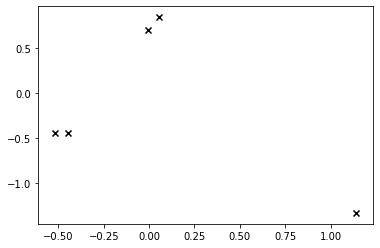

In [60]:
centers = np.array(kmeans1.cluster_centers_)
plt.scatter(centers[:,2], centers[:,3], marker="x", color='k')

# scaling

In [26]:
df_loan_scale=df_loan.apply(zs)

In [27]:
df_loan_scale.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


# model building

In [22]:
kmeans=KMeans()

In [28]:
kmeans.fit(df_loan_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# finding cluster_centers

In [30]:
centroids=kmeans.cluster_centers_

# creating data frame with centroids

In [33]:
df_centroids=pd.DataFrame(centroids,columns=df_loan_scale.columns)

In [34]:
df_centroids.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-0.886405,-0.452456,0.943271,1.179823
1,1.128152,-0.027007,0.967012,-1.397168
2,-0.886405,0.891900,-0.528180,-0.367942
3,1.128152,-0.942297,-0.769496,0.341630
4,1.128152,1.435058,-0.452983,-0.401952


# printing number of clusters and inertias

In [37]:
cluster_range=range(1,15)
inertia=[]
for no_clusters in cluster_range:
    kmeans=KMeans(n_clusters=no_clusters)
    kmeans.fit(df_loan_scale)
    kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)
df_inertia=pd.DataFrame({'No_of_clusters0':cluster_range,'inertia':inertia})

In [38]:
df_inertia.head()

,No_of_clusters0,inertia
0,1,800.000000
1,2,588.802677
2,3,476.860069
3,4,386.714786
4,5,325.109983


# plotting clustes_centers and cluster_errors

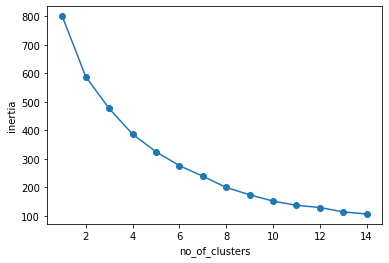

In [40]:
plt.plot(df_inertia['No_of_clusters0'],df_inertia['inertia'],marker='o')
plt.xlabel('no_of_clusters')
plt.ylabel('inertia')
plt.show()

# creating new model with no_of_clusters=5

In [41]:
kmeans1=KMeans(n_clusters=5)

In [42]:
kmeans1.fit(df_loan_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
labels=kmeans1.labels_

# creating labels dataframe

In [44]:
df_labels=pd.DataFrame(labels)

In [45]:
df_labels.head()

,0
0,0
1,0
2,1
3,2
4,1


# joining labels to original dataframe

In [46]:
df_loan_labels=df_loan.join(df_labels)

In [47]:
df_loan_labels.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,2
4,0,31,17,40,1
